In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random
print("Tensor Flow Version: " + str(tf.__version__))

Tensor Flow Version: 1.14.0


In [2]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [3]:
# Retriving handwritten data from cifar10
handwritten_data = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = handwritten_data.load_data()

In [4]:
len(train_images)

60000

In [5]:
len(train_labels)

60000

In [6]:
len(test_images)

10000

In [7]:
len(test_labels)

10000

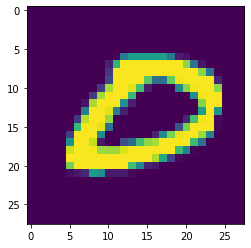

In [8]:
# Printing out a random image from the train data
plt.figure()
plt.imshow(train_images[random.randint(0,60000)])
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

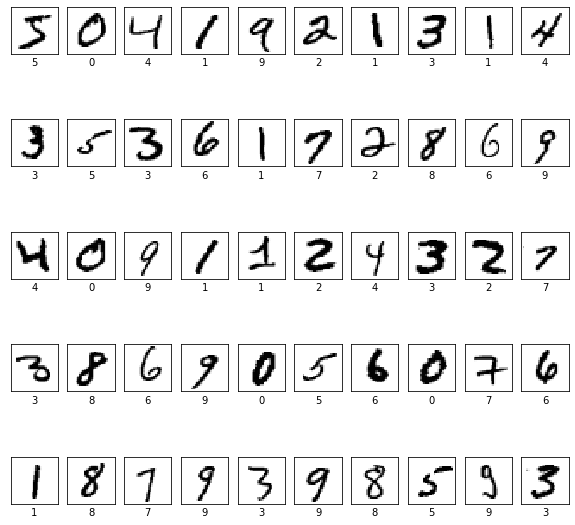

In [10]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
# Build the model
# Set up model structure
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0813 10:27:31.798953 4584854976 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
# Compile the model
# Setting the optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Training the model on train_data
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2622 - acc: 0.9249
Epoch 2/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1134 - acc: 0.9661
Epoch 3/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0775 - acc: 0.9768
Epoch 4/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0583 - acc: 0.9824
Epoch 5/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0444 - acc: 0.9862


In [14]:
# Evaluate mode with test data and determine accuracy
# Want to make sure we are not overfitting during training
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Total Test Accuracy: {test_accuracy * 100:.3f}%")

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0809 - acc: 0.9755
Total Test Accuracy: 97.550%


In [15]:
# Make predictions using the predict function
# This will give a prediction for each image in the testing set
model_predictions = model.predict(test_images)
print(model_predictions)
model_predictions[0]
np.argmax(model_predictions[0])
class_names[np.argmax(model_predictions[0])]

[[7.9002291e-08 4.5071494e-10 3.3214423e-05 ... 9.9903858e-01
  1.3707413e-06 3.8932326e-06]
 [6.6053303e-08 2.7015728e-06 9.9998355e-01 ... 9.7859519e-14
  1.2602486e-05 7.2255185e-13]
 [4.7302805e-05 9.9007845e-01 3.7888341e-04 ... 2.0292103e-03
  6.6147293e-03 8.3601859e-05]
 ...
 [4.4553064e-10 8.6547991e-11 3.4383302e-11 ... 4.5630517e-07
  1.4338644e-05 4.3971926e-05]
 [8.8198004e-11 4.1809750e-12 4.1710268e-12 ... 6.8252183e-12
  9.8293424e-07 3.3046569e-11]
 [5.7003922e-09 1.2059916e-14 7.1615591e-10 ... 5.8196543e-17
  4.6602957e-09 3.9499017e-13]]


'7'

In [16]:
#Printing the class names of each prediction (first 50)
for i in range(50):
    class_name = class_names[np.argmax(model_predictions[i])]
    print('Prediction ' + str(i + 1) + ': ' + str(class_name))

Prediction 1: 7
Prediction 2: 2
Prediction 3: 1
Prediction 4: 0
Prediction 5: 4
Prediction 6: 1
Prediction 7: 4
Prediction 8: 9
Prediction 9: 6
Prediction 10: 9
Prediction 11: 0
Prediction 12: 6
Prediction 13: 9
Prediction 14: 0
Prediction 15: 1
Prediction 16: 5
Prediction 17: 9
Prediction 18: 7
Prediction 19: 3
Prediction 20: 4
Prediction 21: 9
Prediction 22: 6
Prediction 23: 6
Prediction 24: 5
Prediction 25: 4
Prediction 26: 0
Prediction 27: 7
Prediction 28: 4
Prediction 29: 0
Prediction 30: 1
Prediction 31: 3
Prediction 32: 1
Prediction 33: 3
Prediction 34: 4
Prediction 35: 7
Prediction 36: 2
Prediction 37: 7
Prediction 38: 1
Prediction 39: 2
Prediction 40: 1
Prediction 41: 1
Prediction 42: 7
Prediction 43: 4
Prediction 44: 2
Prediction 45: 3
Prediction 46: 5
Prediction 47: 1
Prediction 48: 2
Prediction 49: 4
Prediction 50: 4


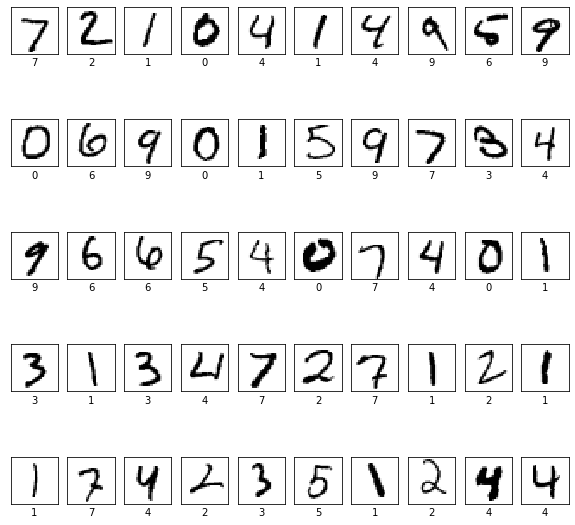

In [17]:
# Print 50 images and classes from predictions
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[np.argmax(model_predictions[i])])
plt.show()